In [ ]:
import xlwings

"0" 클래스는 [1, 0, 0]으로 인코딩

"1" 클래스는 [0, 1, 0]으로 인코딩

"2" 클래스는 [0, 0, 1]으로 인코딩

# TRAIN

In [1]:
import tensorflow as tf
import os
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
batch_size = 32


# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/train"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
dataset = dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
dataset = dataset.shuffle(buffer_size=len(file_paths))
dataset = dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)
print("데이터 len: ",len(dataset))

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)
데이터 len:  338


In [ ]:
import matplotlib.pyplot as plt

# 데이터셋에서 하나의 배치를 가져오기
#for image_batch, label_batch in dataset.take(1):
#    # 이미지와 라벨 출력
#    for image, label in zip(image_batch, label_batch):
#        # 이미지 시각화
#        plt.figure()
#        plt.imshow(image.numpy())
#        plt.title(f"Label: {label.numpy()}")
#        plt.axis("off")
#        plt.show()

# validation

In [2]:
# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/validation"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
val_dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
val_dataset = val_dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
val_dataset = val_dataset.shuffle(buffer_size=len(file_paths))
val_dataset = val_dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in val_dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)


In [3]:
import tensorflow as tf
import os
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
batch_size = 32

# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/test"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
test_dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
test_dataset = test_dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
test_dataset = test_dataset.shuffle(buffer_size=len(file_paths))
test_dataset = test_dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in test_dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)


In [4]:
import tensorflow as tf

def build_pretrained_resnet50(input_shape=(112, 112, 3), num_classes=3):
    # 사전 훈련된 ResNet-50 모델 로드, 최상위 층(Fully Connected layer)은 제외
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # 모델 아키텍처 커스터마이즈
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)  # 평균 풀링 층 추가
    x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)  # 새로운 Fully Connected 층 추가

    # 입력부터 새로운 출력층까지 연결한 전체 모델 생성
    model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

    # 사전 훈련된 가중치를 그대로 사용하면서 새로 추가한 층만 학습하도록 설정
    for layer in base_model.layers:
        layer.trainable = False

    return model

# 모델 생성
model = build_pretrained_resnet50()

# 모델 요약
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 112, 112,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 118, 118,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 56, 56,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 56, 56,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 56, 56,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 58, 58,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 28, 28,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 28, 28,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 28, 28,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 28, 28,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 28, 28,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 28, 28,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 28, 28,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 28, 28,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 28, 28,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 28, 28,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 28, 28,    │      1,024 │ conv2_block1_3_c

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
model_with_cam = build_pretrained_resnet50()

# 모델 학습

#### CUDA -> GPU 사용

In [8]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# GPU 설정 확인
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    device_name = '/GPU:0'
    try:
        # 필요한 경우, 메모리 증가 허용
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
else:
    device_name = '/CPU:0'

print("Training on:", device_name)

Training on: /CPU:0


In [9]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is NOT available")

GPU is NOT available


In [11]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# GPU 설정 확인
if tf.test.is_gpu_available():
    device_name = tf.test.gpu_device_name()
else:
    device_name = '/CPU:0'

print("Training on:", device_name)

with tf.device(device_name):
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    model_with_cam.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
        loss='categorical_crossentropy',
        metrics=METRICS
    )

    checkpoint_callback = ModelCheckpoint(
        filepath='C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/final_best_1.keras',  ## .h5 확장자 제거
        monitor='val_accuracy',
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    )
    history_cam_model = model_with_cam.fit(
        dataset,
        epochs=100,
        validation_data=val_dataset,
        verbose=1,
        callbacks=[checkpoint_callback]
    )

Training on: /CPU:0
Epoch 1/100


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.5367 - loss: 0.9534 - precision: 0.7499 - recall: 0.1643
Epoch 1: val_accuracy improved from -inf to 0.51306, saving model to C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/final_best_1.keras
338/338 ━━━━━━━━━━━━━━━━━━━━ 183s 508ms/step - accuracy: 0.5369 - loss: 0.9531 - precision: 0.7500 - recall: 0.1646 - val_accuracy: 0.5131 - val_loss: 0.9834 - val_precision: 0.5873 - val_recall: 0.3419
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.6286 - loss: 0.7588 - precision: 0.7295 - recall: 0.4641
Epoch 2: val_accuracy improved from 0.51306 to 0.54083, saving model to C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/final_best_1.keras
338/338 ━━━━━━━━━━━━━━━━━━━━ 168s 489ms/step - accuracy: 0.6286 - loss: 0.7588 - precision: 0.7295 - recall: 0.4642 - val_accuracy: 0.5408 - val_loss: 0.9164 - val_precision: 0.6872 - val_recall: 0.3106
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.6594 - loss: 0.7103 - precis

In [12]:
import os

cam_model_path = 'C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/final_best_1.keras'

model_with_cam.save(cam_model_path)

# 예측

In [13]:
loss, accuracy, precision, recall = model_with_cam.evaluate(test_dataset)

113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 399ms/step - accuracy: 0.7329 - loss: 0.5339 - precision: 0.7437 - recall: 0.7046


In [17]:
import os
cam_model_path = 'C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/final_best_1.keras'
cam_model_predict = tf.keras.models.load_model(cam_model_path)

cam_model_predict.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
        loss='categorical_crossentropy',
        metrics=METRICS
    )

In [20]:
def get_one(ds):
    # 데이터셋에서 하나의 샘플 가져오기
    sample = next(iter(ds.take(1)))
    image = sample[0]  # 이미지
    label = sample[1]  # 레이블
    return image, label  # 이미지와 레이블 반환

Label: tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)


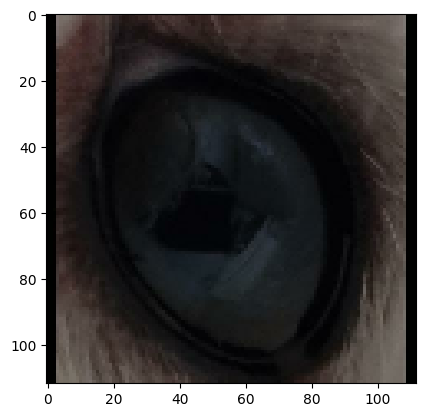

In [33]:
import matplotlib.pyplot as plt

# 샘플 가져오기
image, label = get_one(test_dataset)

# 이미지의 배치 차원 제거하여 단일 이미지로 변환
image = image[0]  # 배치에서 첫 번째 이미지 선택
label = label[0]  # 배치에서 첫 번째 레이블 선택

print("Label:", label)
plt.imshow(image.numpy())
plt.show()

In [24]:
import cv2
import numpy as np

# 이미지를 numpy 배열로 변환
image_np = image.numpy()
input_image = cv2.resize(image_np, (112, 112))
input_image = np.expand_dims(input_image, axis=0)

# 모델 예측
predictions = cam_model_predict.predict(input_image)

# 결과 출력
print(predictions)

predicted_class = np.argmax(predictions)
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.05469875 0.31535816 0.6299431 ]]
2


# CAM

In [28]:
import os
cam_model_path = 'C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/final_best_1.keras'
cam_model = tf.keras.models.load_model(cam_model_path)

In [25]:
def generate_cam(model, image, label):
    # item = copy.deepcopy(item)
    # width = item['image'].shape[1]
    # height = item['image'].shape[0]

    # img_tensor, class_idx = normalize_and_resize_img(item) # 입력 이미지를 정규화하고 크기를 조정

    # 학습한 모델에서 원하는 Layer의 output을 얻기 위해서 모델의 input과 output을 새롭게 정의해줍니다.
    cam_model = tf.keras.models.Model(inputs=model.input, outputs=[model.layers[-3].output, model.output])
    # model.layers[-3] => 우리가 필요로 하는 GAP 이전 Convolution layer의 output을 얻을 수 있기 때문
    # 원본 모델에서 마지막에서 세 번째 레이어의 출력과 원본 모델의 출력을 동시에 반환
    conv_outputs, predictions = cam_model(tf.expand_dims(image, 0))
    # 새로 정의한 모델에 이미지를 전달하여 해당 이미지의 특성 맵 (conv_outputs)과 모델의 예측 결과 (predictions)을 얻기
    conv_outputs = conv_outputs[0, :, :, :] # 특성 맵의 형태를 조정

    # 모델의 weight activation은 마지막 layer에 있습니다.
    class_weights = model.layers[-1].get_weights()[0]
    # 모델의 마지막 레이어에서 클래스 가중치를 가져오기

    cam_image = np.zeros(dtype=np.float32, shape=conv_outputs.shape[0:2])
    # CAM을 저장할 빈 이미지를 생성
    # for i, w in enumerate(class_weights[:, label]): # 각 클래스 가중치에 대해 반복
    #     # conv_outputs의 i번째 채널과 i번째 weight를 곱해서 누적하면 활성화된 정도가 나타날 겁니다.
    #     cam_image += w * conv_outputs[:, :, i]
    #     # 특성 맵의 각 채널에 대해 해당 채널의 클래스 가중치와 곱한 값을 누적하여 CAM을 생성
    for i, w in enumerate(class_weights[label]): # 각 클래스 가중치에 대해 반복
      # conv_outputs의 i번째 채널과 i번째 weight를 곱해서 누적하면 활성화된 정도가 나타날 겁니다.
      cam_image += w * conv_outputs[:, :, i]
      # 특성 맵의 각 채널에 대해 해당 채널의 클래스 가중치와 곱한 값을 누적하여 CAM을 생성

    cam_image /= np.max(cam_image) # activation score를 normalize합니다.
    # CAM을 정규화
    cam_image = cam_image.numpy() # NumPy 배열로 변환
    cam_image = cv2.resize(cam_image, (112, 112)) # 원래 이미지의 크기로 resize합니다.
    return cam_image

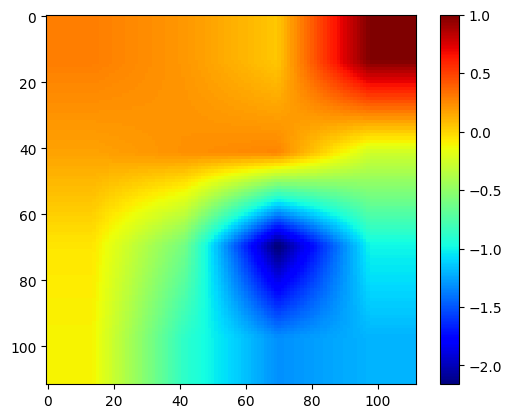

In [35]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# 모델 로드
cam_model_path = 'C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/final_best_1.keras'
cam_model = tf.keras.models.load_model(cam_model_path)

def generate_cam(model, image, label):
    # 모델의 마지막에서 세 번째 레이어의 출력과 모델의 출력을 동시에 반환하는 모델을 정의
    cam_model = tf.keras.models.Model(inputs=model.input, outputs=[model.layers[-3].output, model.output])
    
    # 이미지 차원을 확장하여 배치 차원 추가
    image = tf.expand_dims(image, axis=0)
    
    # 새로 정의한 모델에 이미지를 전달하여 해당 이미지의 특성 맵과 모델의 예측 결과를 얻기
    conv_outputs, predictions = cam_model(image)
    conv_outputs = conv_outputs[0]  # 특성 맵의 형태를 조정

    # 모델의 weight activation은 마지막 레이어에 있습니다.
    class_weights = model.layers[-1].get_weights()[0]

    # CAM을 저장할 빈 이미지를 생성
    cam_image = np.zeros(dtype=np.float32, shape=conv_outputs.shape[:2])
    
    for i, w in enumerate(class_weights[:, label]):
        # 특성 맵의 각 채널에 대해 해당 채널의 클래스 가중치와 곱한 값을 누적하여 CAM을 생성
        cam_image += w * conv_outputs[:, :, i]

    # CAM을 정규화
    cam_image /= np.max(cam_image)
    
    # CAM을 NumPy 배열로 변환
    cam_image = cam_image.numpy()
    
    # 원래 이미지의 크기로 리사이즈
    cam_image = cv2.resize(cam_image, (image.shape[1], image.shape[2]))
    return cam_image

# 예제 이미지 로드 (여기서 image는 텐서로 가정)
# image = tf.keras.preprocessing.image.load_img('path/to/image.jpg', target_size=(112, 112))
# image = tf.keras.preprocessing.image.img_to_array(image)
# image = tf.convert_to_tensor(image, dtype=tf.float32)

# CAM 생성 및 시각화
cam_image = generate_cam(cam_model, image, label=2)
plt.imshow(cam_image, cmap='jet')
plt.colorbar()
plt.show()

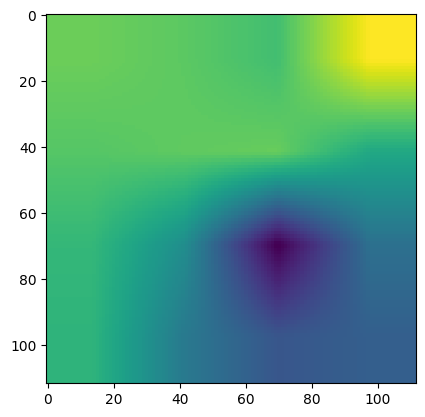

In [34]:
import numpy as np
import cv2

cam_image = generate_cam(cam_model, image, label=2)
plt.imshow(cam_image)
plt.show()

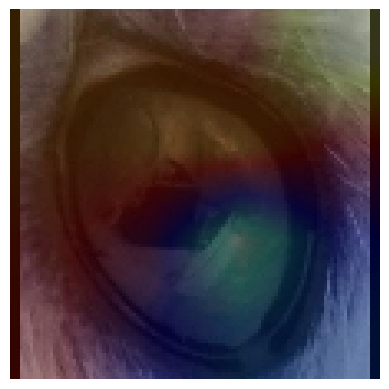

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# 원본 이미지를 NumPy 배열로 변환하고, 0~1 사이의 값으로 정규화
original_image = image.numpy()
if np.max(original_image) > 1:
    original_image = original_image / 255.0

# CAM 이미지를 원본 이미지와 동일한 크기로 조정
cam_image_resized = cv2.resize(cam_image, (original_image.shape[1], original_image.shape[0]))

# CAM 이미지를 히트맵으로 변환
cam_image_normalized = (cam_image_resized - np.min(cam_image_resized)) / (np.max(cam_image_resized) - np.min(cam_image_resized))
cam_heatmap = cv2.applyColorMap(np.uint8(255 * cam_image_normalized), cv2.COLORMAP_JET)

# 원본 이미지를 RGB 형태로 변환
original_image_rgb = original_image
if original_image.shape[2] == 3:  # RGB 이미지인 경우
    original_image_rgb = cv2.cvtColor(np.float32(original_image), cv2.COLOR_BGR2RGB)

# 히트맵을 색상 반전
inverted_heatmap = 255 - cam_heatmap

# 히트맵을 원본 이미지에 더하고 정규화
superimposed_img = inverted_heatmap * 0.2 + np.uint8(255 * original_image_rgb)
superimposed_img = np.clip(superimposed_img, 0, 255)

# 최종 이미지 출력
plt.imshow(np.uint8(superimposed_img))
plt.axis('off')  # 축 숨기기
plt.show()



# 최종 SEGMEN한 데이터로 재학습

# TRAIN

In [1]:
import tensorflow as tf
import os
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
batch_size = 32

# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/woghk/Downloads/final_train"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
dataset = dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
dataset = dataset.shuffle(buffer_size=len(file_paths))
dataset = dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)


# validation

In [2]:
# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/woghk/Downloads/final_valid"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
val_dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
val_dataset = val_dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
val_dataset = val_dataset.shuffle(buffer_size=len(file_paths))
val_dataset = val_dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in val_dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)


# TEST

In [3]:
import tensorflow as tf
import os
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
batch_size = 32

# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/woghk/Downloads/final_test"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
test_dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
test_dataset = test_dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
test_dataset = test_dataset.shuffle(buffer_size=len(file_paths))
test_dataset = test_dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in test_dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)


# RESNET-18

In [4]:
def residual_block(x, filters, kernel_size=3, stride=1):
    x_shortcut = x
    x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    # Shortcut path => x가 바로 이동
    if stride != 1 or x.shape[-1] != filters:
        x_shortcut = tf.keras.layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x_shortcut)
        x_shortcut = tf.keras.layers.BatchNormalization()(x_shortcut)

    # Add the shortcut to the main path => shortcut경로와 주 경로 결합
    x = tf.keras.layers.Add()([x, x_shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    return x

In [5]:
def build_resnet18(input_shape=(112, 112, 3), num_classes=3):
    input_layer = tf.keras.layers.Input(shape=input_shape)

    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(input_layer)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    x = residual_block(x, filters=64, stride=1)
    x = residual_block(x, filters=64, stride=1)

    x = residual_block(x, filters=128, stride=2)
    x = residual_block(x, filters=128, stride=1)

    x = residual_block(x, filters=256, stride=2)
    x = residual_block(x, filters=256, stride=1)

    x = residual_block(x, filters=512, stride=2)
    x = residual_block(x, filters=512, stride=1)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # 분류를 위한 Fully Connected Layer
    x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    # 모델 생성
    model = tf.keras.models.Model(inputs=input_layer, outputs=x)

    return model

In [6]:
model_with_cam = build_resnet18()
model_with_cam.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 112, 112,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 56, 56,    │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 56, 56,    │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 28, 28,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │     36,928 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 28, 28,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28,    │     36,928 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │     36,928 │ activation_3[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        256 │ conv2d_4[0][0]  

 Total params: 11,192,451 (42.70 MB)

 Trainable params: 11,182,851 (42.66 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [7]:
with tf.device('/GPU:0'):
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    model_with_cam.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
        loss='categorical_crossentropy',
        metrics=METRICS
    )

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/진짜_final_best_1(seg+not pretrained).keras',  # 가중치를 저장할 파일 경로
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

with tf.device('/GPU:0'):
  history_cam_model = model_with_cam.fit(
      dataset,
      epochs=100,
      validation_data=val_dataset,
      verbose=1,
      callbacks=[checkpoint_callback]
)

Epoch 1/100


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.6904 - loss: 0.7602 - precision: 0.6974 - recall: 0.6799
Epoch 1: val_accuracy improved from -inf to 0.52611, saving model to C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/진짜_final_best_1(seg+not pretrained).keras
338/338 ━━━━━━━━━━━━━━━━━━━━ 212s 589ms/step - accuracy: 0.6905 - loss: 0.7596 - precision: 0.6976 - recall: 0.6800 - val_accuracy: 0.5261 - val_loss: 1.1934 - val_precision: 0.5278 - val_recall: 0.5161
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.8037 - loss: 0.4188 - precision: 0.8072 - recall: 0.7994
Epoch 2: val_accuracy improved from 0.52611 to 0.71278, saving model to C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/진짜_final_best_1(seg+not pretrained).keras
338/338 ━━━━━━━━━━━━━━━━━━━━ 201s 587ms/step - accuracy: 0.8037 - loss: 0.4188 - precision: 0.8072 - recall: 0.7994 - val_accuracy: 0.7128 - val_loss: 0.7719 - val_precision: 0.7191 - val_recall: 0.7033
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/s

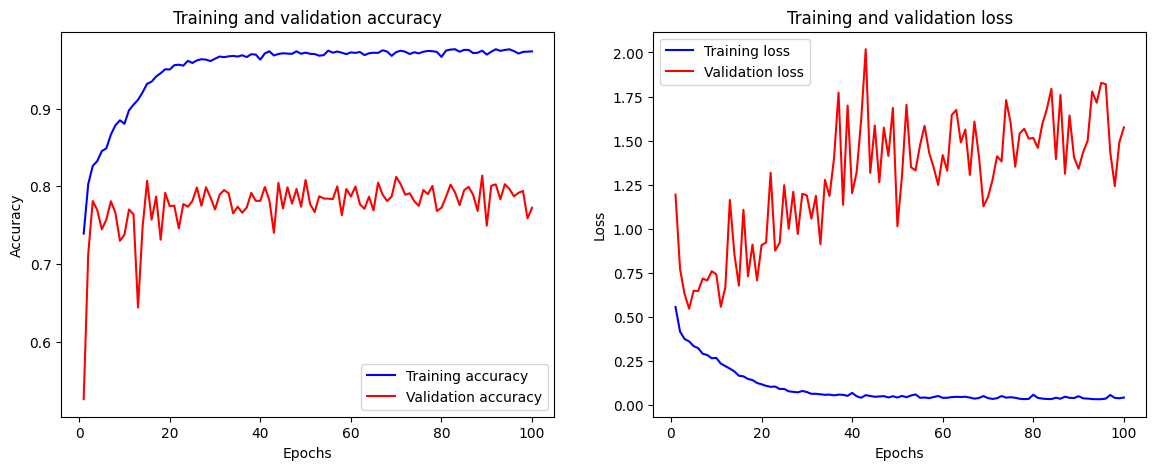

In [10]:
import matplotlib.pyplot as plt

# 훈련 과정 시각화
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# 훈련 후 호출
plot_training_history(history_cam_model)

In [11]:
import os

cam_model_path = 'C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/진짜_final_best_1(seg+not pretrained).keras'

model_with_cam.save(cam_model_path)

# 저장된 경로 출력
print(f'Model saved at: {cam_model_path}')

Model saved at: C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/진짜_final_best_1(seg+not pretrained).keras


In [12]:
loss, accuracy, precision, recall = model_with_cam.evaluate(test_dataset)

113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.7850 - loss: 1.4941 - precision: 0.7851 - recall: 0.7848


## CAM

In [83]:
def get_one(ds):
    # 데이터셋에서 하나의 샘플 가져오기
    sample = next(iter(ds.take(1)))
    image = sample[0]  # 이미지
    label = sample[1]  # 레이블
    return image, label  # 이미지와 레이블 반환

Label: tf.Tensor([0. 1. 0. 0. 0.], shape=(5,), dtype=float32)


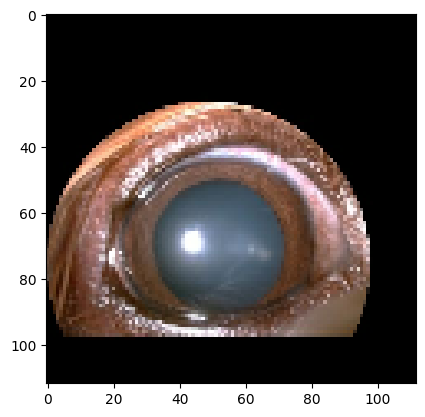

In [84]:
# 샘플 가져오기
image, label = get_one(test_dataset)

# 이미지의 배치 차원 제거하여 단일 이미지로 변환
image = image[0]  # 배치에서 첫 번째 이미지 선택
label = label[0]  # 배치에서 첫 번째 레이블 선택

print("Label:", label)
plt.imshow(image.numpy())
plt.show()

In [46]:
import os
cam_model_path = 'C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/진짜_final_best_1(seg+not pretrained).keras'
cam_model_predict = tf.keras.models.load_model(cam_model_path)

cam_model_predict.compile(
    loss='categorical_crossentropy', ## 변환해야함 -> sparse_categorical_crossentropy
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=METRICS,
)

In [47]:
import cv2
import numpy as np

# 이미지를 numpy 배열로 변환
image_np = image.numpy()
input_image = cv2.resize(image_np, (112, 112))
input_image = np.expand_dims(input_image, axis=0)
      
# 모델 예측
predictions = cam_model_predict.predict(input_image)
      
# 결과 출력
print(predictions)

predicted_class = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00101848 0.27104393 0.7279375 ]]


In [51]:
def generate_cam(model, image, label):
    # item = copy.deepcopy(item)
    # width = item['image'].shape[1]
    # height = item['image'].shape[0]
    
    # img_tensor, class_idx = normalize_and_resize_img(item) # 입력 이미지를 정규화하고 크기를 조정
    
    # 학습한 모델에서 원하는 Layer의 output을 얻기 위해서 모델의 input과 output을 새롭게 정의해줍니다.
    cam_model = tf.keras.models.Model([model.inputs], [model.layers[-3].output, model.output]) 
    # model.layers[-3] => 우리가 필요로 하는 GAP 이전 Convolution layer의 output을 얻을 수 있기 때문
    # 원본 모델에서 마지막에서 세 번째 레이어의 출력과 원본 모델의 출력을 동시에 반환
    conv_outputs, predictions = cam_model(tf.expand_dims(image, 0))
    # 새로 정의한 모델에 이미지를 전달하여 해당 이미지의 특성 맵 (conv_outputs)과 모델의 예측 결과 (predictions)을 얻기
    conv_outputs = conv_outputs[0, :, :, :] # 특성 맵의 형태를 조정
    
    # 모델의 weight activation은 마지막 layer에 있습니다.
    class_weights = model.layers[-1].get_weights()[0] 
    # 모델의 마지막 레이어에서 클래스 가중치를 가져오기

    cam_image = np.zeros(dtype=np.float32, shape=conv_outputs.shape[0:2])
    # CAM을 저장할 빈 이미지를 생성
    # for i, w in enumerate(class_weights[:, label]): # 각 클래스 가중치에 대해 반복
    #     # conv_outputs의 i번째 채널과 i번째 weight를 곱해서 누적하면 활성화된 정도가 나타날 겁니다.
    #     cam_image += w * conv_outputs[:, :, i]
    #     # 특성 맵의 각 채널에 대해 해당 채널의 클래스 가중치와 곱한 값을 누적하여 CAM을 생성
    for i, w in enumerate(class_weights[label]): # 각 클래스 가중치에 대해 반복
      # conv_outputs의 i번째 채널과 i번째 weight를 곱해서 누적하면 활성화된 정도가 나타날 겁니다.
      cam_image += w * conv_outputs[:, :, i]
      # 특성 맵의 각 채널에 대해 해당 채널의 클래스 가중치와 곱한 값을 누적하여 CAM을 생성

    cam_image /= np.max(cam_image) # activation score를 normalize합니다.
    # CAM을 정규화
    cam_image = cam_image.numpy() # NumPy 배열로 변환
    cam_image = cv2.resize(cam_image, (224, 224)) # 원래 이미지의 크기로 resize합니다.
    return cam_image

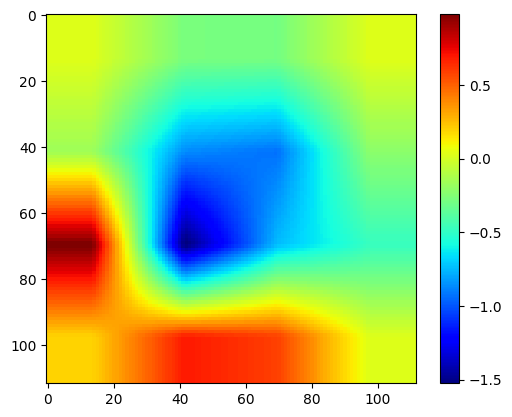

In [85]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# 모델 로드
cam_model_path = 'C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/진짜_final_best_1(seg+not pretrained).keras'
cam_model = tf.keras.models.load_model(cam_model_path)

def generate_cam(model, image, label):
    # 모델의 마지막에서 세 번째 레이어의 출력과 모델의 출력을 동시에 반환하는 모델을 정의
    cam_model = tf.keras.models.Model(inputs=model.input, outputs=[model.layers[-3].output, model.output])
    
    # 이미지 차원을 확장하여 배치 차원 추가
    image = tf.expand_dims(image, axis=0)
    
    # 새로 정의한 모델에 이미지를 전달하여 해당 이미지의 특성 맵과 모델의 예측 결과를 얻기
    conv_outputs, predictions = cam_model(image)
    conv_outputs = conv_outputs[0]  # 특성 맵의 형태를 조정

    # 모델의 weight activation은 마지막 레이어에 있습니다.
    class_weights = model.layers[-1].get_weights()[0]

    # CAM을 저장할 빈 이미지를 생성
    cam_image = np.zeros(dtype=np.float32, shape=conv_outputs.shape[:2])
    
    for i, w in enumerate(class_weights[:, label]):
        # 특성 맵의 각 채널에 대해 해당 채널의 클래스 가중치와 곱한 값을 누적하여 CAM을 생성
        cam_image += w * conv_outputs[:, :, i]

    # CAM을 정규화
    cam_image /= np.max(cam_image)
    
    # CAM을 NumPy 배열로 변환
    cam_image = cam_image.numpy()
    
    # 원래 이미지의 크기로 리사이즈
    cam_image = cv2.resize(cam_image, (image.shape[1], image.shape[2]))
    return cam_image

# 예제 이미지 로드 (여기서 image는 텐서로 가정)
# image = tf.keras.preprocessing.image.load_img('path/to/image.jpg', target_size=(112, 112))
# image = tf.keras.preprocessing.image.img_to_array(image)
# image = tf.convert_to_tensor(image, dtype=tf.float32)

# CAM 생성 및 시각화
cam_image = generate_cam(cam_model, image, label=2)
plt.imshow(cam_image, cmap='jet')
plt.colorbar()
plt.show()

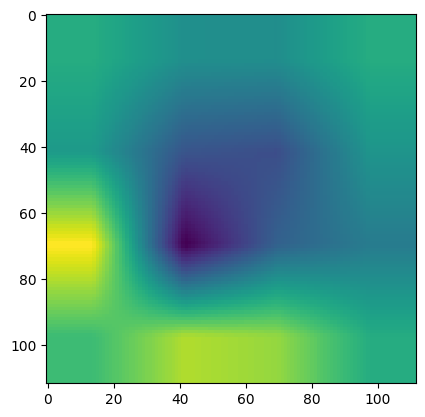

In [86]:
import numpy as np
import cv2

cam_image = generate_cam(model_with_cam, image, label=predicted_class)
plt.imshow(cam_image)
plt.show()

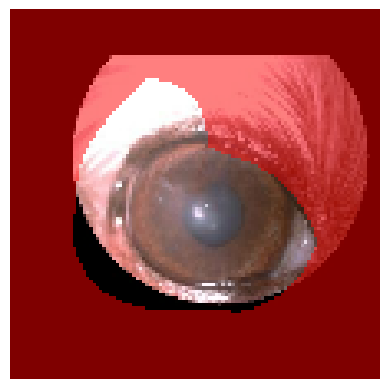

In [78]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 원본 이미지를 NumPy 배열로 변환하고, 0~1 사이의 값으로 정규화
original_image = image.numpy()
if np.max(original_image) > 1:
    original_image = original_image / 255.0

# CAM 이미지를 원본 이미지와 동일한 크기로 조정
cam_image_resized = cv2.resize(cam_image, (original_image.shape[1], original_image.shape[0]))

# CAM 이미지를 히트맵으로 변환
cam_image_normalized = (cam_image_resized - np.min(cam_image_resized)) / (np.max(cam_image_resized) - np.min(cam_image_resized))

# 히트맵의 특정 임계값 이상인 부분만 강조
threshold = 0.7  # 임계값 설정 (0과 1 사이)
mask = cam_image_normalized >= threshold

# 빨간색 히트맵 적용
highlighted_heatmap = np.zeros_like(original_image)
highlighted_heatmap[mask] = [1, 0, 0]  # 빨간색 (RGB)

# 원본 이미지에 히트맵 적용
superimposed_img = original_image.copy()
superimposed_img[mask] = 0.5 * original_image[mask] + 0.5 * highlighted_heatmap[mask]

# 최종 이미지 출력
plt.imshow(np.uint8(superimposed_img * 255))
plt.axis('off')  # 축 숨기기
plt.show()

# 질병 2개 추가해서 최종 학습!!!!!!!!!!!!!!!!

In [24]:
import tensorflow as tf
import os

IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
batch_size = 32

# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

def create_dataset(data_dir, class_names):
    file_paths = []
    labels = []
    
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                file_path = os.path.join(class_dir, filename)
                file_paths.append(file_path)
                labels.append(i)
    
    num_classes = len(class_names)
    labels_onehot = tf.one_hot(labels, num_classes)
    
    image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)
    
    dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))
    dataset = dataset.map(load_and_preprocess_image)
    dataset = dataset.shuffle(buffer_size=len(file_paths))
    dataset = dataset.batch(batch_size)
    
    return dataset

class_names = ["0", "1", "2", "3", "4"]

# 데이터 디렉토리 설정
train_data_dir = "C:/Users/woghk/Downloads/final_train"
val_data_dir = "C:/Users/woghk/Downloads/final_valid"
test_data_dir = "C:/Users/woghk/Downloads/final_test"

# 데이터셋 생성
train_dataset = create_dataset(train_data_dir, class_names)
val_dataset = create_dataset(val_data_dir, class_names)
test_dataset = create_dataset(test_data_dir, class_names)

for image_batch, label_batch in train_dataset.take(1):
    print("Train - Image batch shape:", image_batch.shape)
    print("Train - Label batch shape:", label_batch.shape)

for image_batch, label_batch in val_dataset.take(1):
    print("Validation - Image batch shape:", image_batch.shape)
    print("Validation - Label batch shape:", label_batch.shape)

for image_batch, label_batch in test_dataset.take(1):
    print("Test - Image batch shape:", image_batch.shape)
    print("Test - Label batch shape:", label_batch.shape)

# ResNet 모델 정의
def residual_block(x, filters, kernel_size=3, stride=1):
    x_shortcut = x
    x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    if stride != 1 or x.shape[-1] != filters:
        x_shortcut = tf.keras.layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x_shortcut)
        x_shortcut = tf.keras.layers.BatchNormalization()(x_shortcut)

    x = tf.keras.layers.Add()([x, x_shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    return x

def build_resnet18(input_shape=(112, 112, 3), num_classes=5):
    input_layer = tf.keras.layers.Input(shape=input_shape)

    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(input_layer)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    x = residual_block(x, filters=64, stride=1)
    x = residual_block(x, filters=64, stride=1)

    x = residual_block(x, filters=128, stride=2)
    x = residual_block(x, filters=128, stride=1)

    x = residual_block(x, filters=256, stride=2)
    x = residual_block(x, filters=256, stride=1)

    x = residual_block(x, filters=512, stride=2)
    x = residual_block(x, filters=512, stride=1)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=input_layer, outputs=x)

    return model

# 모델 컴파일 및 훈련
model = build_resnet18()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/final_best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=100,
        validation_data=val_dataset,
        verbose=1,
        callbacks=[checkpoint_callback]
    )

model.save('C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/final_best_model.keras')

# 최종 성능 평가
loss, accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {accuracy}')

Train - Image batch shape: (32, 112, 112, 3)
Train - Label batch shape: (32, 5)
Validation - Image batch shape: (32, 112, 112, 3)
Validation - Label batch shape: (32, 5)
Test - Image batch shape: (32, 112, 112, 3)
Test - Label batch shape: (32, 5)
Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.5597 - loss: 1.1290
Epoch 1: val_accuracy improved from -inf to 0.41726, saving model to C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/final_best_model.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 352s 594ms/step - accuracy: 0.5598 - loss: 1.1287 - val_accuracy: 0.4173 - val_loss: 1.9158
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.6831 - loss: 0.7788
Epoch 2: val_accuracy improved from 0.41726 to 0.62283, saving model to C:/Users/woghk/OneDrive/바탕 화면/24년/융캡디2/final_best_model.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 344s 601ms/step - accuracy: 0.6831 - loss: 0.7788 - val_accuracy: 0.6228 - val_loss: 0.9954
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 

KeyboardInterrupt: 